In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Conv3D, ConvLSTM2D, BatchNormalization, Flatten, MaxPooling2D
import pickle
from keras.optimizers import Adam
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import ClusterCentroids

Using TensorFlow backend.


In [2]:
start_time = time.clock()
np.random.seed(7)
random.seed(7)

tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True))
sess = print(tf.Session(config=tf.ConfigProto(log_device_placement=True)))

In [3]:
file_path = '../../data/output/integrated_data_done.csv'

input_data = pd.read_csv(file_path)

In [4]:
data = input_data[:25000]
data.shape

(25000, 381)

In [5]:
del input_data

In [ ]:
data.isnull().any()

In [6]:
# Class count
count_class_0, count_class_1 = data.busBunching.value_counts()

# Divide by class
df_class_0 = data[data['busBunching'] == 0]
df_class_1 = data[data['busBunching'] == 1]

In [7]:
df_class_0_under = df_class_0.sample(count_class_1)
df_data_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_data_under.busBunching.value_counts())

Random under-sampling:
1    1888
0    1888
Name: busBunching, dtype: int64


In [42]:
df_data_under.shape

(3776, 379)

In [8]:
# get label column and remove it from data
y = data['headway']
df_data_under.drop('headway', axis=1, inplace=True)
df_data_under.drop('busBunching', axis=1, inplace=True)

In [9]:
rows = 5 # TODO min quantity of gps points per route (should be the same) 
cols = df_data_under.shape[1] # quantity of attributes
n_samples = df_data_under.shape[0] # all examples
n_frames = 3 # TODO total of routes
n_channels = 1

In [10]:
# convert input data format to multidimensional matrices

total_input = np.zeros((n_samples, n_frames, rows, cols, n_channels), dtype=np.float)
label = np.zeros((n_samples, 1), dtype=int)

for line in range(n_samples):
    for col in range(cols):
#         total_input[line, 0, 0:line, col, 0] = X_resampled.iloc[:,col][line]
        total_input[line, 0, 0:line, col, 0] = df_data_under.iloc[line,col]#X_resampled[line][col]
        
#     label[line, 0] = y_resampled.iloc[line]
    label[line, 0] = y.iloc[line] #y_resampled[line]

# total_input = total_input[:n_samples, :, :, :]
# label = label[:n_samples, 0]

In [107]:
total_input.shape

(3775, 3, 5, 378, 1)

In [108]:
label.shape

(3775, 1)

In [11]:
# no_class = len(list(set(np.ndarray.flatten(label))))
no_class = 587
threshold = len(total_input[0, 0, :, 0, 0])

# Making training and test data: 80% Training, 20% Test
train_X, test_X, train_Y, test_Y = train_test_split(total_input, label, test_size=0.20, random_state=7)

# Converts a class vector (integers) to binary class matrix
train_Y = keras.utils.to_categorical(train_Y, num_classes=no_class)
test_Y = keras.utils.to_categorical(test_Y, num_classes=no_class)

In [13]:
model = Sequential()
# if data_format='channels_last' 4D tensor with shape: (samples, rows, cols, channels)
model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
                   input_shape=(n_frames, rows, cols, n_channels),
                   padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())

# model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
#                    padding='same', return_sequences=True))
# model.add(BatchNormalization())


model.add(Conv3D(filters=16, kernel_size=(3, 3, 3),
               activation='relu',
               padding='same', data_format='channels_last'))

model.add(Flatten())
# model.add(Dense(model.output_shape[1], activation='relu'))
# model.add(Dropout(.5))

model.add(Dense(no_class, activation='relu'))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

In [14]:
# train the network
offline_history = model.fit(train_X, train_Y, batch_size=16, epochs=4, validation_data=(test_X, test_Y))

W0801 11:58:59.307325 140392522004288 deprecation.py:323] From /home/veruska/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0801 11:59:00.654513 140392522004288 deprecation_wrapper.py:119] From /home/veruska/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3020 samples, validate on 756 samples
Epoch 1/4
3020/3020 [==============================] - 223s 74ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 2/4
3020/3020 [==============================] - 220s 73ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 3/4
3020/3020 [==============================] - 220s 73ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 4/4
3020/3020 [==============================] - 221s 73ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


In [15]:
offline_history.history

{'val_loss': [0.001703577465377748,
  0.001703577465377748,
  0.001703577465377748,
  0.001703577465377748],
 'val_mean_squared_error': [0.001703577465377748,
  0.001703577465377748,
  0.001703577465377748,
  0.001703577465377748],
 'loss': [0.0033835377915768534,
  0.001703577465377748,
  0.001703577465377748,
  0.001703577465377748],
 'mean_squared_error': [0.0033835377915768534,
  0.001703577465377748,
  0.001703577465377748,
  0.001703577465377748]}

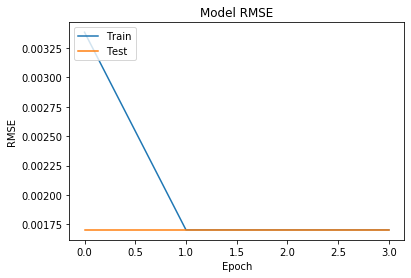

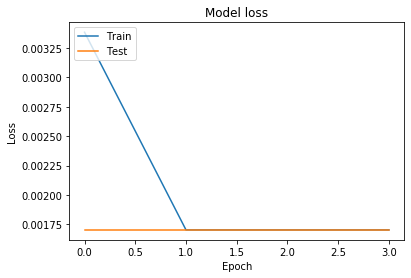

In [18]:
# Plot training & validation accuracy values
plt.plot(offline_history.history['mean_squared_error'])
plt.plot(offline_history.history['val_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(offline_history.history['loss'])
plt.plot(offline_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
A = np.argmax(offline_history.history['val_loss'])
print('the optimal epoch size: {}, the value of less loss {}'.format(offline_history.epoch[A], 
                                                                     np.min(offline_history.history['val_loss'])))

# Calculating the test accuracy, precision, recall
pred = model.predict(test_X, batch_size=16)
pred_label = np.argmax(pred, axis=1)

the optimal epoch size: 0, the value of less loss 0.001703577465377748


MSE (Mean Squared Error): Média dos erros quadráticos 

In [23]:
model.evaluate(test_X, test_Y)

756/756 [==============================] - 7s 9ms/step


[0.001703577465377748, 0.001703577465377748]

In [30]:
test_X[0,0,0,:,:]

array([[ 6.80000000e+01],
       [ 1.00000000e+00],
       [ 1.26180000e+04],
       [-8.05674598e+00],
       [-3.48986623e+01],
       [ 1.07890000e+04],
       [ 1.20230000e+04],
       [ 0.00000000e+00],
       [-8.05674598e+00],
       [-3.48986623e+01],
       [ 0.00000000e+00],
       [ 6.50000000e+03],
       [ 0.00000000e+00],
       [ 2.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 5.00000000e+00],
       [ 8.00000000e+00],
       [ 1.00000000e+00],
       [ 0.00000000e+00],
       [-8.05672800e+00],
       [-3.48985890e+01],
       [ 8.28711796e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 1.51600000e+03],
       [ 2.17800000e+03],
       [ 4.00000000e+00],
       [ 2.00000000e+00],
       [ 4.44000000e+00],
       [ 4.37425194e+01],
       [ 5.00000000e+00],
       [ 1.20250000e+04],
       [ 8.00000000e+00],
       [ 1.20000000e+01],
       [ 1.20000000e+01],
       [ 1.2

In [36]:
test_Y[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
model.metrics_names

['loss', 'mean_squared_error']

In [64]:
ActualPositive = []
for i in range(no_class):
    AA = np.where(test_Y == i)[0]
    ActualPositive.append(AA)

PredictedPositive = []
for i in range(no_class):
    AA = np.where(pred_label == i)[0]
    PredictedPositive.append(AA)

TruePositive = []
FalsePositive = []
for i in range(no_class):
    AA = []
    BB = []
    for j in PredictedPositive[i]:
        if pred_label[j] == test_Y[j,1]:
            AA.append(j)
        else:
            BB.append(j)
    TruePositive.append(AA)
    FalsePositive.append(BB)
Precision = []
Recall = []


precision = ( len(TruePositive[0]) + len(TruePositive[1]) ) / ( len(PredictedPositive[0]) + len(PredictedPositive[1]) )
recall = ( len(TruePositive[0]) + len(TruePositive[1]) ) / ( len(ActualPositive[0]) + len(ActualPositive[1]) )

ConfusionM = confusion_matrix(list(test_Y[:,1]), pred_label, labels=[0, 1, 2, 3, 4])

In [65]:
print('Confusion Matrix: ', ConfusionM)
print('Recall', recall)
print('Precision', precision)
print(time.clock() - start_time, "seconds")

Confusion Matrix:  [[753   0   0   0   0]
 [  2   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
Recall 0.0016968172845515264
Precision 0.9973509933774835
6801.5019090000005 seconds
